In [1]:
import functions as fn
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from PIL import Image
from scipy.stats import norm

# Perfect Integrator

In [2]:
sigma_i = 0.2 
xi_i = 0.2
xi_s = 0
tau = 200 #ms
dt = tau/40 #ms
mu = 0.2
x = 0
n_trials =10000
stimulus_duration = 1000
frames_duration = dt
bound = 0.5
alfa = 1
step = 0.1
sigma_s = 0.25
start_mu = -0.5
final_mu = 0.6

200


Text(0,0.5,'Decision value')

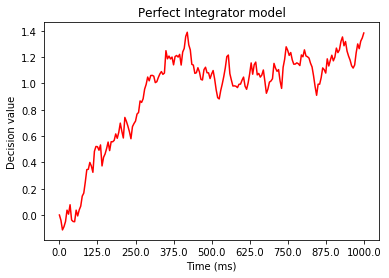

In [3]:
DDM_trials, stimulus_list = fn.perfect_integrator(x, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, stimulus_duration, frames_duration)
print(len(stimulus_list[0]))
plt.plot(np.arange(0,len(DDM_trials[0]),1),DDM_trials[0],"r")     
plt.title("Perfect Integrator model")
plt.xlabel("Time (ms)")
positions = [tau/8*n for n in range(9)]
labels = [stimulus_duration/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")

## Variating mu

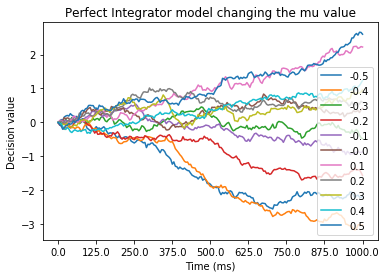

In [4]:
right_choice_list = []
for mu in np.arange(start_mu, final_mu, step):
    trials, stimulus_list = fn.perfect_integrator(x, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, stimulus_duration, frames_duration)
    plt.plot(np.arange(0,len(trials[0]),1),trials[0],label = round(mu,2))
    right_choice_list.append(fn.prob_right(trials,mu)) 
plt.title("Perfect Integrator model changing the mu value")
plt.xlabel("Time (ms)")
positions = [tau/8*n for n in range(9)]
labels = [stimulus_duration/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")
plt.legend()

Text(0.5,1,'Psychometric curve for the perfect integrator model')

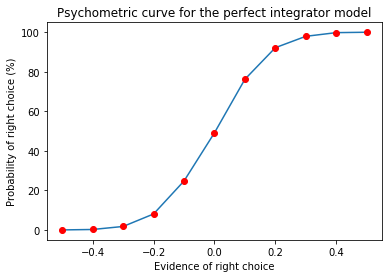

In [5]:
plt.plot(np.arange(start_mu, final_mu, step),right_choice_list)
plt.plot(np.arange(start_mu, final_mu, step),right_choice_list,"ro")
plt.ylabel("Probability of right choice (%)")
plt.xlabel("Evidence of right choice")
plt.title("Psychometric curve for the perfect integrator model")

## Variating sigma_s

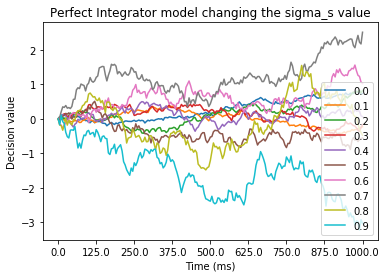

In [6]:
sigma_s = 0.25
start_sigma_s = 0
final_sigma_s = 1
step = 0.1
mu = 0.1
accuracy_list_pi = []
for sigma_s in np.arange(start_sigma_s, final_sigma_s, step):
    trials, stimulus_list = fn.perfect_integrator(x, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, stimulus_duration, frames_duration)
    plt.plot(np.arange(0,len(trials[0]),1),trials[0],label = round(sigma_s,2))
    accuracy_list_pi.append(fn.accuracy(trials,sigma_s)) 
plt.title("Perfect Integrator model changing the sigma_s value")
plt.xlabel("Time (ms)")
positions = [tau/8*n for n in range(9)]
labels = [stimulus_duration/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")
plt.legend()

Text(0.5,1,'Accuracy over sigma_s for the perfect integrator model')

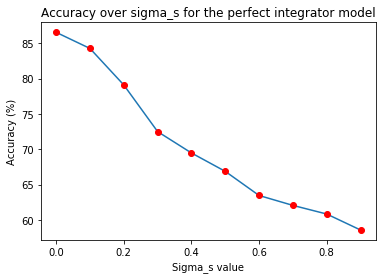

In [7]:
plt.plot(np.arange(start_sigma_s, final_sigma_s, step),accuracy_list_pi)
plt.plot(np.arange(start_sigma_s, final_sigma_s, step),accuracy_list_pi,"ro")
plt.ylabel("Accuracy (%)")
plt.xlabel("Sigma_s value")
plt.title("Accuracy over sigma_s for the perfect integrator model")

## Variating sigma_i value

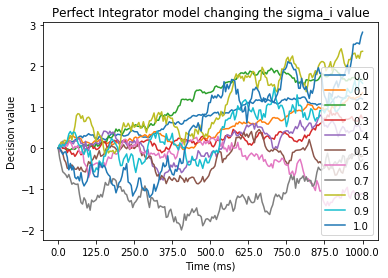

In [8]:
sigma_s = 0.2
start_sigma_i = 0
final_sigma_i = 1.1
step = 0.1
mu = 0.2
accuracy_list = []
for sigma_i in np.arange(start_sigma_i, final_sigma_i, step):
    trials, stimulus_list = fn.perfect_integrator(x, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, stimulus_duration, frames_duration)
    plt.plot(np.arange(0,len(trials[0]),1),trials[0],label = round(sigma_i,2))
    accuracy_list.append(fn.accuracy(trials,sigma_i)) 
plt.title("Perfect Integrator model changing the sigma_i value")
plt.xlabel("Time (ms)")
positions = [tau/8*n for n in range(9)]
labels = [stimulus_duration/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")
plt.legend()

Text(0.5,1,'Accuracy over sigma_i for the perfect integrator model')

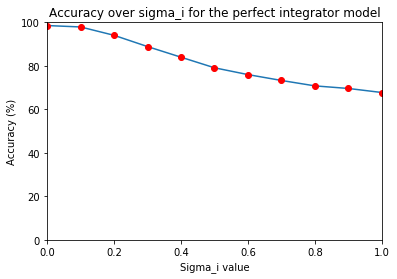

In [9]:
plt.plot(np.arange(start_sigma_i, final_sigma_i, step),accuracy_list)
plt.plot(np.arange(start_sigma_i, final_sigma_i, step),accuracy_list,"ro")
plt.axis([0,1,0,100])
plt.ylabel("Accuracy (%)")
plt.xlabel("Sigma_i value")
plt.title("Accuracy over sigma_i for the perfect integrator model")

## Kernel

Optimization terminated successfully.
         Current function value: 0.507883
         Iterations 6


Text(0.5,1,'Psychophysical Kernel Perfect Integrator')

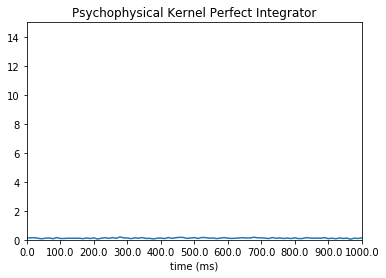

In [10]:
sigma_s = 0.3
sigma_i = 0.2
start_sigma_s = 0
final_sigma_s = 1
step = 0.1
mu = 0.1

trials, stimulus_list = fn.perfect_integrator(x, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, stimulus_duration, frames_duration)
pars_list = fn.kernel(trials,stimulus_list)
plt.plot(np.arange(0,len(pars_list),1),pars_list)
plt.axis([0,90,0,15])
positions = [90/10*n for n in range(11)]
labels = [round(1000/10*n,1) for n in range(11)]
plt.xticks(positions, labels)
plt.xlabel("time (ms)")
plt.title("Psychophysical Kernel Perfect Integrator")

## DDM Absorbing

In [11]:
sigma_i = 0.2 # I consider that there is no internal noise
xi_i = 0.2
xi_s = 0
tau = 200 #ms
dt = tau/40 #ms
mu = 0.2
x = 0
n_trials =10000
stimulus_duration = 1000
frames_duration = dt
bound = 0.5
alfa = 1
step = 0.1
sigma_s = 0.25
start_mu = -0.5
final_mu = 0.6

Text(0,0.5,'Decision value')

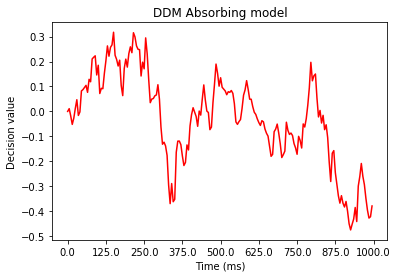

In [12]:
mu = 0.1
bound = 0.5
DDM_absorbing_trials, stimulus_list = fn.DDM_absorbing(x, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, stimulus_duration, frames_duration,bound)
plt.plot(np.arange(0,len(DDM_absorbing_trials[0]),1),DDM_absorbing_trials[0],"r")     
plt.title("DDM Absorbing model")
plt.xlabel("Time (ms)")
positions = [tau/8*n for n in range(9)]
labels = [stimulus_duration/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")

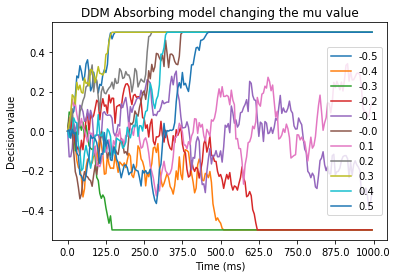

In [13]:
bound = 0.5
alfa = 1
step = 0.1
sigma_s = 0.25
start_mu = -0.5
final_mu = 0.6
right_choice_list = []
for mu in np.arange(start_mu, final_mu, step):
    trials, stimulus_list = fn.DDM_absorbing(x, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, stimulus_duration, frames_duration,bound)
    plt.plot(np.arange(0,len(trials[0]),1),trials[0],label = round(mu,2))
    right_choice_list.append(fn.prob_right(trials,mu)) 
plt.title("DDM Absorbing model changing the mu value")
plt.xlabel("Time (ms)")
positions = [tau/8*n for n in range(9)]
labels = [stimulus_duration/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")
plt.legend()

Text(0.5,1,'Psychometric curve for the DDM Absorbing model')

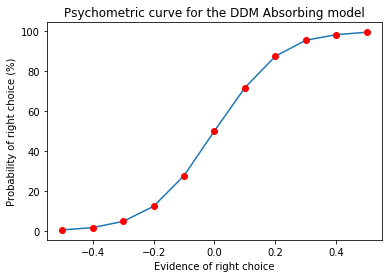

In [14]:
plt.plot(np.arange(start_mu, final_mu, step),right_choice_list)
plt.plot(np.arange(start_mu, final_mu, step),right_choice_list,"ro")
plt.ylabel("Probability of right choice (%)")
plt.xlabel("Evidence of right choice")
plt.title("Psychometric curve for the DDM Absorbing model")

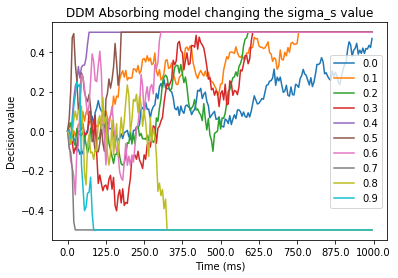

In [15]:
sigma_s = 0.25
start_sigma_s = 0
final_sigma_s = 1
step = 0.1
mu = 0.1
accuracy_list_abs = []
for sigma_s in np.arange(start_sigma_s, final_sigma_s, step):
    trials, stimulus_list = fn.DDM_absorbing(x, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, stimulus_duration, frames_duration,bound)
    plt.plot(np.arange(0,len(trials[0]),1),trials[0],label = round(sigma_s,2))
    accuracy_list_abs.append(fn.accuracy(trials,sigma_s)) 
plt.title("DDM Absorbing model changing the sigma_s value")
plt.xlabel("Time (ms)")
positions = [tau/8*n for n in range(9)]
labels = [stimulus_duration/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")
plt.legend()

Text(0.5,1,'Accuracy over sigma_s for the DDM Absorbing model')

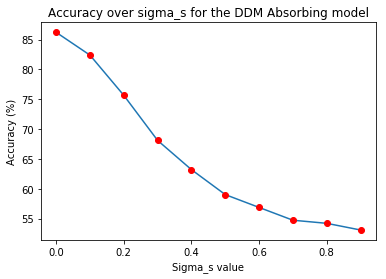

In [16]:
plt.plot(np.arange(start_sigma_s, final_sigma_s, step),accuracy_list_abs)
plt.plot(np.arange(start_sigma_s, final_sigma_s, step),accuracy_list_abs,"ro")
plt.ylabel("Accuracy (%)")
plt.xlabel("Sigma_s value")
plt.title("Accuracy over sigma_s for the DDM Absorbing model")

Optimization terminated successfully.
         Current function value: 0.336507
         Iterations 7


Text(0.5,1,'Psychophysical Kernel DDM absorbing')

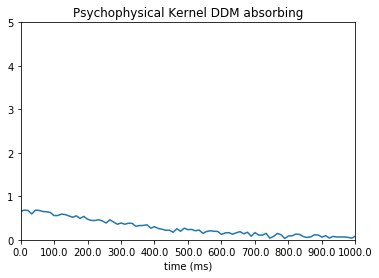

In [17]:
sigma_s = 0.5
sigma_i = 0.2
start_sigma_s = 0
final_sigma_s = 1
step = 0.1
mu = 0.1

trials, stimulus_list = fn.DDM_absorbing(x, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, stimulus_duration, frames_duration,bound)
pars_list = fn.kernel(trials,stimulus_list)
plt.plot(np.arange(0,len(pars_list),1),pars_list)
plt.axis([0,90,0,5])
positions = [90/10*n for n in range(11)]
labels = [round(1000/10*n,1) for n in range(11)]
plt.xticks(positions, labels)
plt.xlabel("time (ms)")
plt.title("Psychophysical Kernel DDM absorbing")

## DDM Reflecting

In [18]:
sigma_i = 0.2 # I consider that there is no internal noise
xi_i = 0.2
xi_s = 0
tau = 200 #ms
dt = tau/40 #ms
mu = 0.2
x = 0
n_trials =10000
stimulus_duration = 1000
frames_duration = dt
bound = 0.5
alfa = 1
step = 0.1
sigma_s = 0.25
start_mu = -0.5
final_mu = 0.6

Text(0,0.5,'Decision value')

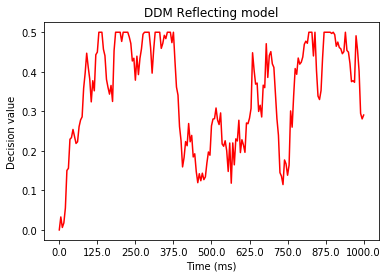

In [19]:
mu = 0.2
bound = 0.5
DDM_reflecting_trials, stimulus_list = fn.DDM_reflecting(x, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, stimulus_duration, frames_duration,bound)
plt.plot(np.arange(0,len(DDM_reflecting_trials[0]),1),DDM_reflecting_trials[0],"r")     
plt.title("DDM Reflecting model")
plt.xlabel("Time (ms)")
positions = [tau/8*n for n in range(9)]
labels = [stimulus_duration/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")

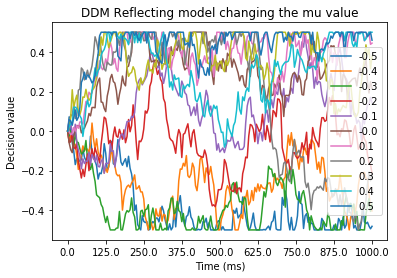

In [20]:
bound = 0.5
alfa = 1
step = 0.1
sigma_s = 0.25
start_mu = -0.5
final_mu = 0.6
right_choice_list = []
for mu in np.arange(start_mu, final_mu, step):
    trials, stimulus_list = fn.DDM_reflecting(x, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, stimulus_duration, frames_duration,bound)
    plt.plot(np.arange(0,len(trials[0]),1),trials[0],label = round(mu,2))
    right_choice_list.append(fn.prob_right(trials,mu)) 
plt.title("DDM Reflecting model changing the mu value")
plt.xlabel("Time (ms)")
positions = [tau/8*n for n in range(9)]
labels = [stimulus_duration/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")
plt.legend()

Text(0.5,1,'Psychometric curve for the DDM Absorbing model')

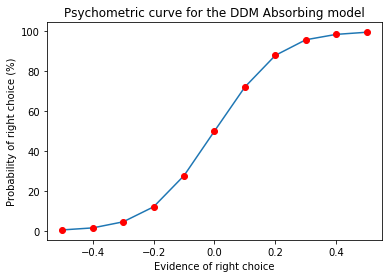

In [21]:
plt.plot(np.arange(start_mu, final_mu, step),right_choice_list)
plt.plot(np.arange(start_mu, final_mu, step),right_choice_list,"ro")
plt.ylabel("Probability of right choice (%)")
plt.xlabel("Evidence of right choice")
plt.title("Psychometric curve for the DDM Absorbing model")

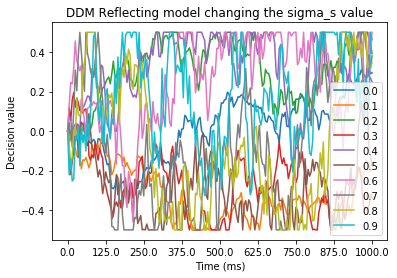

In [22]:
start_sigma_s = 0
final_sigma_s = 1
step = 0.1
mu = 0.1
accuracy_list_ref = []
for sigma_s in np.arange(start_sigma_s, final_sigma_s, step):
    trials, stimulus_list = fn.DDM_reflecting(x, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, stimulus_duration, frames_duration,bound)
    plt.plot(np.arange(0,len(trials[0]),1),trials[0],label = round(sigma_s,2))
    accuracy_list_ref.append(fn.accuracy(trials,sigma_s)) 
plt.title("DDM Reflecting model changing the sigma_s value")
plt.xlabel("Time (ms)")
positions = [tau/8*n for n in range(9)]
labels = [stimulus_duration/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")
plt.legend()

Text(0.5,1,'Accuracy over sigma_s for the DDM Reflecting model')

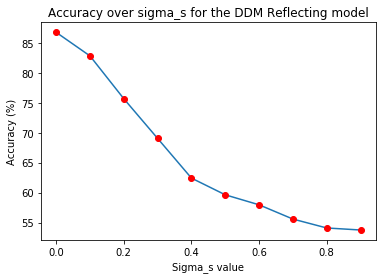

In [23]:
plt.plot(np.arange(start_sigma_s, final_sigma_s, step),accuracy_list_ref)
plt.plot(np.arange(start_sigma_s, final_sigma_s, step),accuracy_list_ref,"ro")
plt.ylabel("Accuracy (%)")
plt.xlabel("Sigma_s value")
plt.title("Accuracy over sigma_s for the DDM Reflecting model")

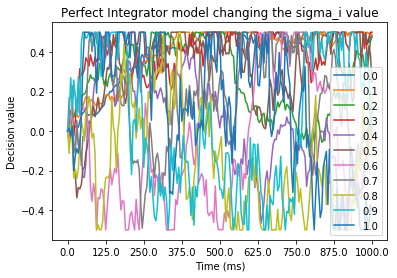

In [24]:
sigma_s = 0.1
start_sigma_i = 0
final_sigma_i = 1.1
step = 0.1
mu = 0.2
accuracy_list = []
for sigma_i in np.arange(start_sigma_i, final_sigma_i, step):
    trials, stimulus_list = fn.DDM_reflecting(x, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, stimulus_duration, frames_duration,bound)
    plt.plot(np.arange(0,len(trials[0]),1),trials[0],label = round(sigma_i,2))
    accuracy_list.append(fn.accuracy(trials,sigma_i)) 
plt.title("Perfect Integrator model changing the sigma_i value")
plt.xlabel("Time (ms)")
positions = [tau/8*n for n in range(9)]
labels = [stimulus_duration/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")
plt.legend()

Text(0.5,1,'Accuracy over sigma_i for the DDM_ reflecting model')

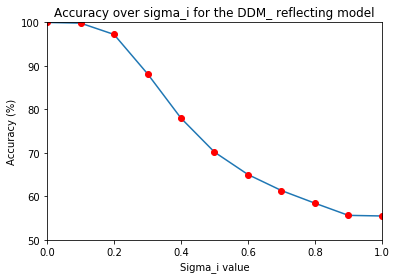

In [25]:
plt.plot(np.arange(start_sigma_i, final_sigma_i, step),accuracy_list)
plt.plot(np.arange(start_sigma_i, final_sigma_i, step),accuracy_list,"ro")
plt.ylabel("Accuracy (%)")
plt.axis([0,1,50,100])
plt.xlabel("Sigma_i value")
plt.title("Accuracy over sigma_i for the DDM_ reflecting model")

Optimization terminated successfully.
         Current function value: 0.344605
         Iterations 7


Text(0.5,1,'Psychophysical Kernel DDM reflecting')

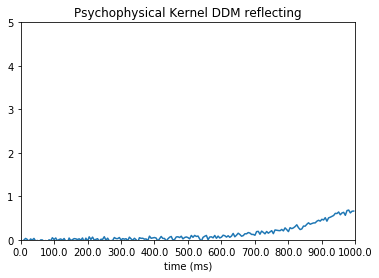

In [26]:
sigma_s = 0.5
sigma_i = 0.2
start_sigma_s = 0
final_sigma_s = 1
step = 0.1
mu = 0.1
accuracy_list = []

trials, stimulus_list = fn.DDM_reflecting(x, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, n_trials, stimulus_duration, frames_duration,bound)
pars_list = fn.kernel(trials,stimulus_list)
plt.plot(np.arange(0,len(pars_list),1),pars_list)
plt.axis([0,200,0,5])
positions = [200/10*n for n in range(11)]
labels = [round(1000/10*n,1) for n in range(11)]
plt.xticks(positions, labels)
plt.xlabel("time (ms)")
plt.title("Psychophysical Kernel DDM reflecting")

([<matplotlib.axis.XTick at 0x7f1be46e14e0>,
 <a list of 9 Text xticklabel objects>)

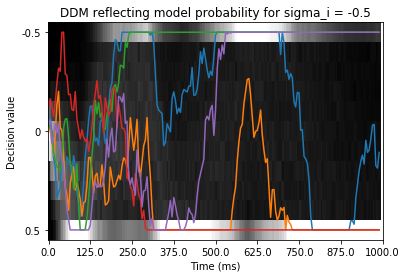

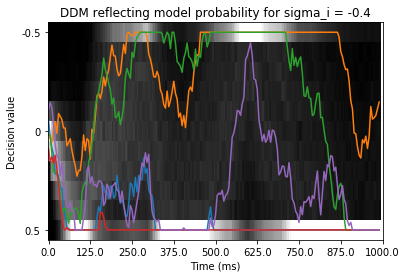

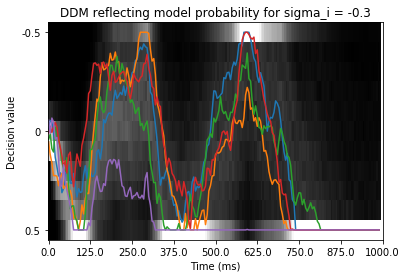

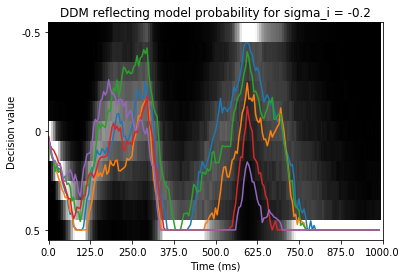

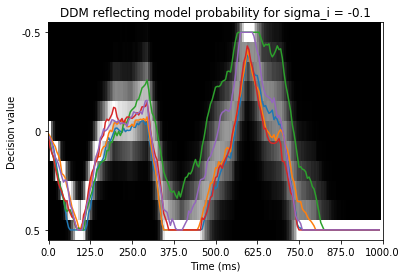

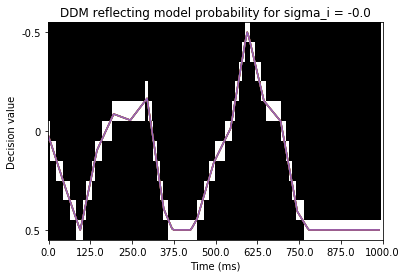

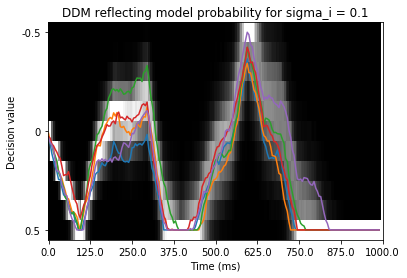

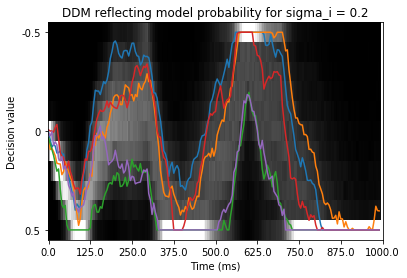

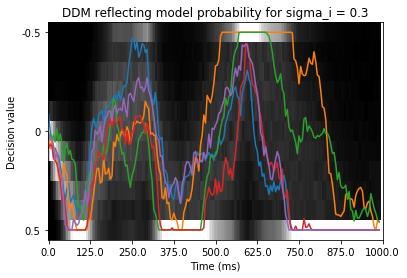

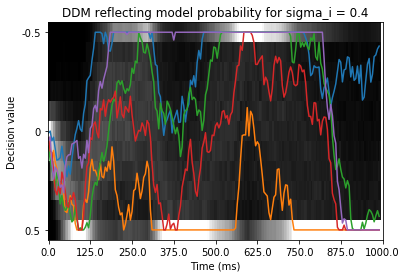

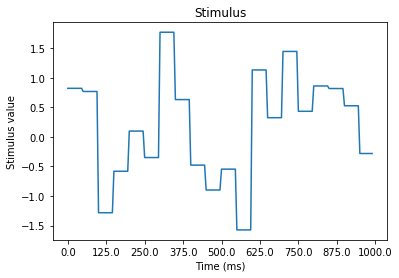

In [27]:
# Defining the values used for this simulation
sigma_s = 0.2
mu = 0
bound = 0.5
bound1 = -0.5
step = 0.1
start_sigma_i = -0.5
final_sigma_i = 0.5
# In this error_list, 0 will be stored if the sign of the mu value and the decision making are equal, and 1 will be stored if they are different:
error_list = []
xi_s = np.random.randn(1)
stimulus_list = []
counter = 0
for i in range(199):
    stimulus_list.append(xi_s)
    counter += 1
    if counter == 10:
        xi_s  = np.random.randn(1)
        counter = 0
    
for sigma_i in np.arange(start_sigma_i, final_sigma_i, step):
    matrix = np.zeros((int(bound-bound1)*10+1,199))
    decision_values1 = []
    for z in range(999):
        # The starting decision value will be 0:
        x = 0
        decision_value = []
        i = 0
        # The process will be repeated two hundred times (1 second stimulus) 
        for xi_s in stimulus_list:
            xi_i = np.random.randn(1)
            # Solved differential diffusion equation:
            x = x - (dt/tau)*(-mu)+np.sqrt(dt/tau)*(sigma_i*xi_i+sigma_s*xi_s)
            # If the bound is exceeded, it will return the value of the bound
            if x> bound:
                decision_value.append([bound])
            elif x < bound1:
                decision_value.append([bound1])
            else:
                decision_value.append(x)
            position = int(round(decision_value[i][0],1)*10+bound*10)
            matrix[position][i] += 1
            i += 1
        if z < 5:
            decision_values1.append(decision_value)

    plt.figure()
    im = Image.fromarray(matrix/1.5)
    plt.imshow(im,aspect = "auto")
    for a in range(len(decision_values1)):
        decision_values = [(i[0]+bound)*10 for i in decision_values1[a]]
        plt.plot(np.arange(0,199,1),decision_values)          
        plt.title("DDM reflecting model probability for sigma_i = "+str(round(sigma_i,2)))
        plt.xlabel("Time (ms)")
        positions = [200/8*n for n in range(9)]
        labels = [1000/8*n for n in range(9)]
        plt.xticks(positions, labels)
        plt.yticks([10/2*n for n in range(3)],[bound1,0,bound])
        plt.ylabel("Decision value")
    
plt.figure()
plt.plot(np.arange(0,199,1),stimulus_list)          
plt.title("Stimulus")
plt.xlabel("Time (ms)")
plt.ylabel("Stimulus value")
positions = [200/8*n for n in range(9)]
labels = [1000/8*n for n in range(9)]
plt.xticks(positions, labels)

## DW

In [28]:
sigma_i = 0.2 # I consider that there is no internal noise
xi_i = 0.2
xi_s = 0
tau = 200 #ms
dt = tau/40 #ms
mu = 0.2
x = 0
n_trials =10000
stimulus_duration = 1000
frames_duration = dt
bound = 0.5
alfa = 1
step = 0.1
sigma_s = 0.25
start_mu = -0.5
final_mu = 0.6

Text(0,0.5,'Decision value')

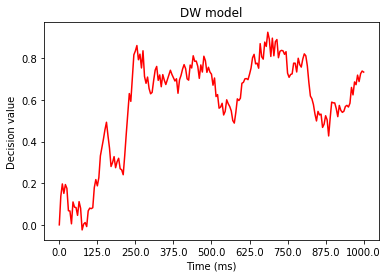

In [29]:
alfa = 1
mu = 0.2
bound = 0.5
#DW(x_value, dt, tau, mu, sigma_i, sigma_s, alfa, n_trials, stimulus_duration, frames_duration)
DW_trials, stimulus_list = fn.DW(x, dt, tau, mu, sigma_i, sigma_s,alfa, n_trials, stimulus_duration, frames_duration)
plt.plot(np.arange(0,len(DW_trials[0]),1),DW_trials[0],"r")     
plt.title("DW model")
plt.xlabel("Time (ms)")
positions = [tau/8*n for n in range(9)]
labels = [stimulus_duration/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")

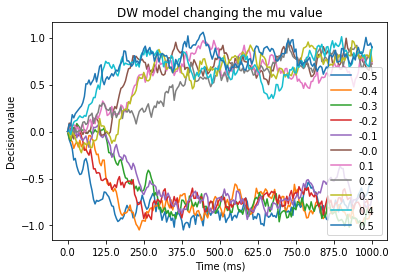

In [30]:
bound = 0.5
alfa = 1
step = 0.1
sigma_s = 0.25
start_mu = -0.5
final_mu = 0.6
right_choice_list = []
for mu in np.arange(start_mu, final_mu, step):
    trials, stimulus_list = fn.DW(x, dt, tau, mu, sigma_i, sigma_s, alfa, n_trials, stimulus_duration, frames_duration)
    plt.plot(np.arange(0,len(trials[0]),1),trials[0],label = round(mu,2))
    right_choice_list.append(fn.prob_right(trials,mu)) 
plt.title("DW model changing the mu value")
plt.xlabel("Time (ms)")
positions = [tau/8*n for n in range(9)]
labels = [stimulus_duration/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")
plt.legend()

Text(0.5,1,'Psychometric curve for the DW model')

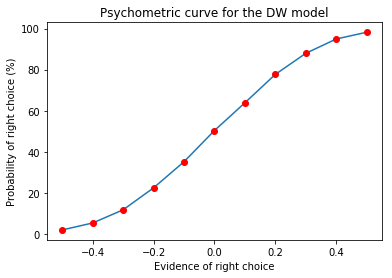

In [31]:
plt.plot(np.arange(start_mu, final_mu, step),right_choice_list)
plt.plot(np.arange(start_mu, final_mu, step),right_choice_list,"ro")
plt.ylabel("Probability of right choice (%)")
plt.xlabel("Evidence of right choice")
plt.title("Psychometric curve for the DW model")

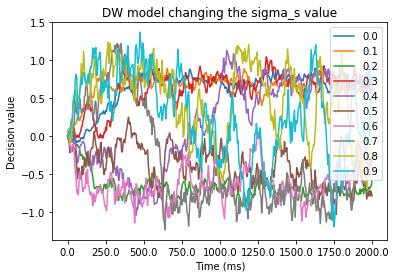

In [32]:
start_sigma_s = 0
final_sigma_s = 1
step = 0.1
mu = 0.1
stimulus_duration = 2000
accuracy_list_dw = []
for sigma_s in np.arange(start_sigma_s, final_sigma_s, step):
    trials, stimulus_list = fn.DW(x, dt, tau, mu, sigma_i, sigma_s, alfa, n_trials, stimulus_duration, frames_duration)
    plt.plot(np.arange(0,len(trials[0]),1),trials[0],label = round(sigma_s,2))
    accuracy_list_dw.append(fn.accuracy(trials,sigma_s)) 
plt.title("DW model changing the sigma_s value")
plt.xlabel("Time (ms)")
positions = [2*tau/8*n for n in range(9)]
labels = [stimulus_duration/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")
plt.legend()

Text(0.5,1,'Accuracy over sigma_s for the DW model')

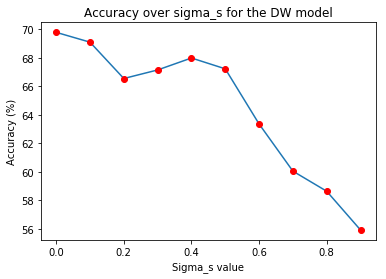

In [33]:
plt.plot(np.arange(start_sigma_s, final_sigma_s, step),accuracy_list_dw)
plt.plot(np.arange(start_sigma_s, final_sigma_s, step),accuracy_list_dw,"ro")
plt.ylabel("Accuracy (%)")
plt.xlabel("Sigma_s value")
plt.title("Accuracy over sigma_s for the DW model")

Optimization terminated successfully.
         Current function value: 0.264114
         Iterations 8


Text(0.5,1,'Psychophysical Kernel DWM')

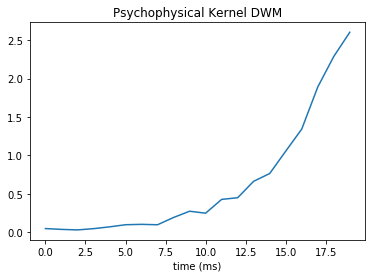

In [34]:
sigma_s = 0.4
sigma_i = 0.2
step = 0.1
mu = 0
stimulus_duration = 1000
frames_duration = 50
tau = 200
dt = tau/40

trials, stimulus_list =  fn.DW(x, dt, tau, mu, sigma_i, sigma_s, alfa, n_trials, stimulus_duration, frames_duration)
pars_list = fn.kernel(trials,stimulus_list)
plt.plot(np.arange(0,len(pars_list),1),pars_list)
#plt.axis([0,tau/frames_duration,0,15])
positions = [200/10*n for n in range(11)]
labels = [round(1000/10*n,1) for n in range(11)]
#plt.xticks(positions, labels)
plt.xlabel("time (ms)")
plt.title("Psychophysical Kernel DWM")

### Accuracy over sigma_s value for all models:

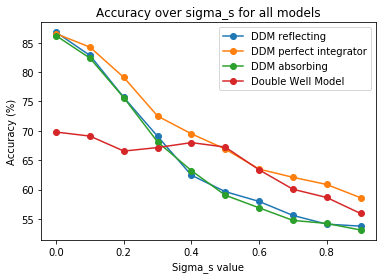

In [35]:
plt.plot(np.arange(start_sigma_s, final_sigma_s, step),accuracy_list_ref,label ="DDM reflecting",marker="o")
plt.plot(np.arange(start_sigma_s, final_sigma_s, step),accuracy_list_pi,label ="DDM perfect integrator",marker="o")
plt.plot(np.arange(start_sigma_s, final_sigma_s, step),accuracy_list_abs,label ="DDM absorbing",marker="o")
plt.plot(np.arange(start_sigma_s, final_sigma_s, step),accuracy_list_dw,label ="Double Well Model",marker="o")
plt.ylabel("Accuracy (%)")
plt.xlabel("Sigma_s value")
plt.title("Accuracy over sigma_s for all models")
plt.legend()

# Forward matrix

In [36]:
stimulus_duration = 1000
sigma_i = 0.25 # I consider that there is no internal noise
xi_i = 0.2
xi_s = 0.2
tau = 200 #ms
dt = tau/40 #ms
mu = -0.4
x = 0
n_trials =1000
stimulus_duration = 1000
frames_duration = dt
bound = 0.5
alfa = 1
sigma_s = 0.25


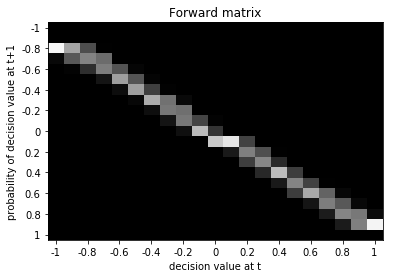

In [37]:
L = 1
xi_s = np.random.randn(1)
stimulus_list = []
counter = 0

from sklearn.preprocessing import normalize
import math
from scipy.stats import norm
forward_matrix = np.zeros((int(10*(L+L)+1),int(10*(L+L)+1)))
y = 0
for x in np.arange(-L,L+0.1,0.1): 
    mean = x-(dt/tau)*(-mu-alfa*x*2+4*x**3)
    stdr_dev = np.sqrt(dt/tau)*np.sqrt(sigma_i**2+sigma_s**2)
    x_1 = np.random.normal(mean, stdr_dev, 5000)
    x_2 = []
    for item in x_1:
        if item >= L:
            x_2.append(L-0.1)
        elif item <= -L:
            x_2.append(-L+0.1)
        else:
            x_2.append(item)
    # evaluate the histogram
    values, base = np.histogram(x_2, bins=10)
    #evaluate the cumulative
    cumulative = np.cumsum(values)
    
    base_t = []
    for number in base:
        stepper = 10.0
        base_t.append(math.trunc(stepper * number) / stepper)
    index = 0
    for i in range(len(base_t)-1):
        if i == 0:
            z = int(base_t[i]*10)+L*10
        else:
            if base_t[i] != base_t[i-1]:
                forward_matrix[int(base_t[i]*10+L*10)][y] = cumulative[i]-cumulative[index]
                index = i
    y += 1 
forward_matrix = normalize(forward_matrix, axis=0, norm='l1')
plt.figure()
im = Image.fromarray(forward_matrix*256)

plt.title ("Forward matrix")
plt.xlabel("decision value at t")
plt.ylabel("probability of decision value at t+1")
positions = [0,2,4,6,8,10,12,14,16,18,20]
labels = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
plt.xticks(positions, labels)
plt.yticks(positions,labels)
plt.imshow(im,aspect = "auto")

([<matplotlib.axis.XTick at 0x7f1c0de43a90>,
 <a list of 9 Text xticklabel objects>)

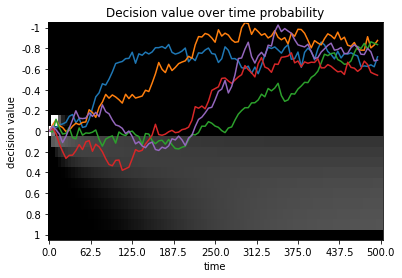

In [38]:
stimulus_duration = 100
vector = np.zeros((1,21))[0]
vector[10] = 1        
final = [vector]
for i in range(stimulus_duration):
    vector = forward_matrix.dot(vector)
    final.append(vector)
final = np.asarray(final)
final = final.transpose()
trials, stimulus_list =  fn.DW(0, dt, tau, mu, sigma_i, sigma_s, alfa, 5, 500, 5)
#DW(x_value, dt, tau, mu, sigma_i, xi_i, sigma_s, xi_s, alfa, n_trials, stimulus_duration, frames_duration)

im = Image.fromarray(normalize(final)*600)

fig, ax = plt.subplots(1,1)
img = ax.imshow(im,aspect = "auto")
positions = [0,2,4,6,8,10,12,14,16,18,20]
labels = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
for trial in trials:
    trial.pop()
    trial_new = []
    for i in trial:
        trial_new.append((i+L)*10)
    plt.plot(np.arange(0,100,1),trial_new)
plt.yticks(positions, labels)
plt.title("Decision value over time probability")
plt.xlabel("time")
plt.ylabel("decision value")
positions = [100/8*n for n in range(9)]
labels = [500/8*n for n in range(9)]
plt.xticks(positions, labels)

Text(0,0.5,'decision value')

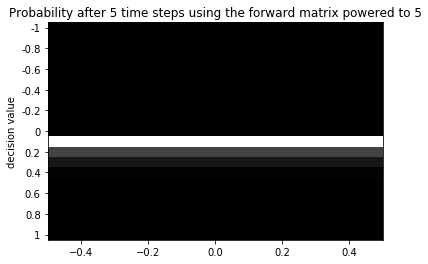

In [39]:
vector = np.zeros((1,21))[0]
vector[10] = 1   
forward_matrix_power = np.linalg.matrix_power(forward_matrix, 5)
final = forward_matrix_power.dot(vector)
final = [[i] for i in final]
final = np.asarray(final)
im = Image.fromarray(final*400)

fig, ax = plt.subplots(1,1)

img = ax.imshow(im,aspect = "auto")
positions = [0,2,4,6,8,10,12,14,16,18,20]
labels = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
plt.yticks(positions, labels)
plt.title("Probability after 5 time steps using the forward matrix powered to 5")
plt.ylabel("decision value")

Text(0.5,0,'decision value')

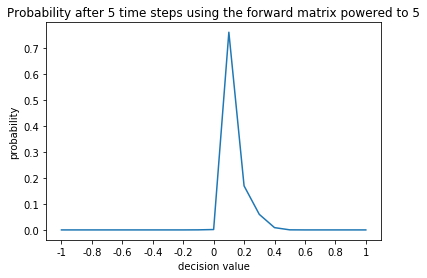

In [40]:
plt.plot(np.arange(0,len(final),1),final)
positions = [0,2,4,6,8,10,12,14,16,18,20]
labels = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
plt.xticks(positions, labels)
plt.title("Probability after 5 time steps using the forward matrix powered to 5")
plt.ylabel("probability")
plt.xlabel("decision value")